In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import h3
import matplotlib.cm as cm
import matplotlib.colors as colors

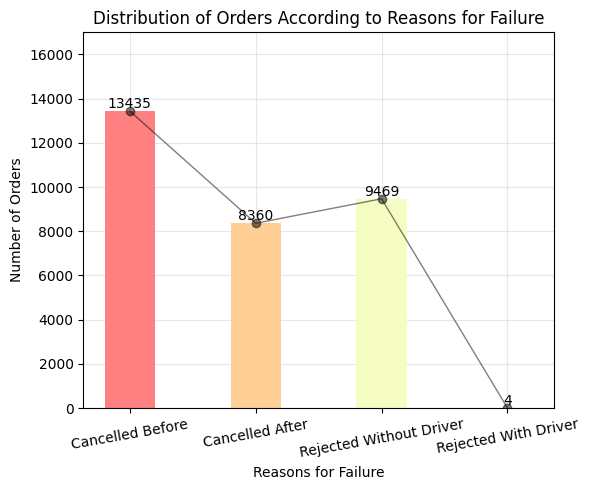

In [236]:
# Step 1: Read the CSV files
data_orders = pd.read_csv("data_orders.csv")
data_offers = pd.read_csv("data_offers.csv")

# Step 2: Merge the datasets
merged_data = pd.merge(data_orders, data_offers, on='order_gk')

# Step 3: Create categories for reasons for failure
cancellations_before_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 0) & (merged_data['order_status_key'] == 4)]
cancellations_after_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 1) & (merged_data['order_status_key'] == 4)]
rejected_without_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 0) & (merged_data['order_status_key'] == 9)]
rejected_with_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 1) & (merged_data['order_status_key'] == 9)]

# Step 4: Count the number of orders in each category
order_counts = [
    cancellations_before_assignment.shape[0],
    cancellations_after_assignment.shape[0],
    rejected_without_assignment.shape[0],
    rejected_with_assignment.shape[0]
]

# Step 5: Plot the bar chart
categories = ['Cancelled Before', 'Cancelled After', 'Rejected Without Driver', 'Rejected With Driver']

plt.figure(figsize=(6, 5))

# Plotting the bar chart
#bars = plt.bar(categories, order_counts, color=['#496c88','#feb2b4','#a5b6c5','skyblue'],width=0.4,zorder=2)
bars = plt.bar(categories, order_counts, color=['#FF8080','#FFCF96','#F6FDC3','#967E76'],width=0.4,zorder=2)

# Find the highest points of each bar
highest_points = [rect.get_height() for rect in bars]
max_height = max(highest_points)

# Find the indices of bars with the highest points
highest_indices = [i for i, height in enumerate(highest_points) if height == max_height]

# Connect the highest points of each bar with lines
for i in range(len(highest_indices) - 1):
    plt.plot([bars[highest_indices[i]].get_x() + bars[highest_indices[i]].get_width() / 2,
              bars[highest_indices[i + 1]].get_x() + bars[highest_indices[i + 1]].get_width() / 2],
             [max_height, max_height], color='red')

# Plotting the line plot
plt.plot(categories, order_counts, marker='o', color='black', linestyle='-', linewidth=1,alpha=0.5)

# Displaying values on top of each bar
for bar, count in zip(bars, order_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.xlabel('Reasons for Failure')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders According to Reasons for Failure')
# 设置 y 轴的范围
plt.ylim(0, 17000)

plt.xticks(rotation=10)
# Add grid lines before plotting the bars
plt.grid(True,which='both', alpha=0.3,zorder=0)
plt.tight_layout()
plt.show()


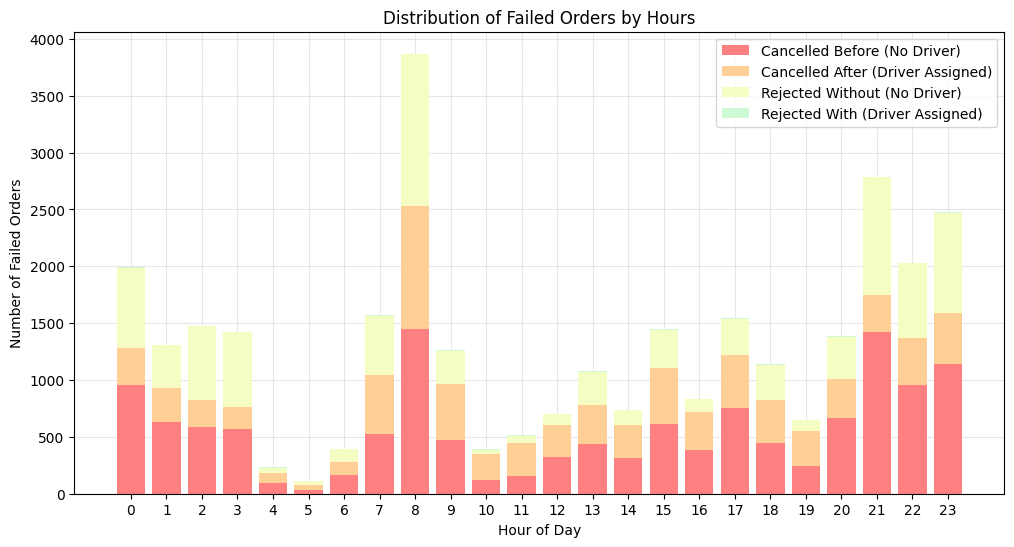

In [237]:
# Step 1: Extract hour from order_datetime
merged_data['order_datetime'] = pd.to_datetime(merged_data['order_datetime'])
merged_data['hour'] = merged_data['order_datetime'].dt.hour

# Step 2: Filter failed orders based on categories
failed_before_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 0) & 
                                       (merged_data['order_status_key'] == 4)]
failed_after_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 1) & 
                                      (merged_data['order_status_key'] == 4)]
rejected_without_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 0) & 
                                          (merged_data['order_status_key'] == 9)]
rejected_with_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 1) & 
                                       (merged_data['order_status_key'] == 9)]

# Step 3: Count failed orders by hour for each category
failed_before_assignment_by_hour = failed_before_assignment.groupby('hour').size()
failed_after_assignment_by_hour = failed_after_assignment.groupby('hour').size()
rejected_without_assignment_by_hour = rejected_without_assignment.groupby('hour').size()
rejected_with_assignment_by_hour = rejected_with_assignment.groupby('hour').size()

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(12, 6))

hours = range(24)

plt.bar(hours, failed_before_assignment_by_hour, label='Cancelled Before (No Driver)', color='#FF8080',zorder = 2)#a5b6c5
plt.bar(hours, failed_after_assignment_by_hour, bottom=failed_before_assignment_by_hour, label='Cancelled After (Driver Assigned)', color='#FFCF96',zorder = 2)
plt.bar(hours, rejected_without_assignment_by_hour, bottom=failed_before_assignment_by_hour + failed_after_assignment_by_hour, label='Rejected Without (No Driver)', color='#F6FDC3',zorder = 2)
plt.bar(hours, rejected_with_assignment_by_hour, bottom=failed_before_assignment_by_hour + failed_after_assignment_by_hour + rejected_without_assignment_by_hour, label='Rejected With (Driver Assigned)', color='#CDFAD5',zorder = 2)

plt.title('Distribution of Failed Orders by Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Failed Orders')
plt.xticks(hours)
plt.legend()
plt.grid(True,zorder = 0,alpha = 0.3)
plt.show()

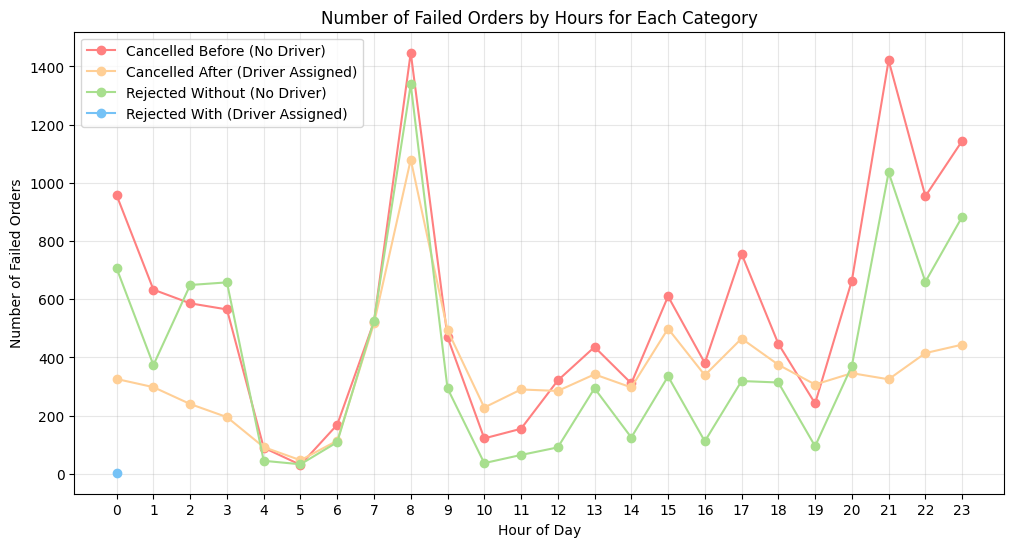

In [246]:
# Step 1: Extract hour from order_datetime
merged_data['order_datetime'] = pd.to_datetime(merged_data['order_datetime'])
merged_data['hour'] = merged_data['order_datetime'].dt.hour

# Step 2: Filter failed orders based on categories
failed_before_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 0) & 
                                       (merged_data['order_status_key'] == 4)]
failed_after_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 1) & 
                                      (merged_data['order_status_key'] == 4)]
rejected_without_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 0) & 
                                          (merged_data['order_status_key'] == 9)]
rejected_with_assignment = merged_data[(merged_data['is_driver_assigned_key'] == 1) & 
                                       (merged_data['order_status_key'] == 9)]

# Step 3: Count failed orders by hour for each category
failed_before_assignment_by_hour = failed_before_assignment.groupby('hour').size().reset_index(name='count')
failed_after_assignment_by_hour = failed_after_assignment.groupby('hour').size().reset_index(name='count')
rejected_without_assignment_by_hour = rejected_without_assignment.groupby('hour').size().reset_index(name='count')
rejected_with_assignment_by_hour = rejected_with_assignment.groupby('hour').size().reset_index(name='count')

# Step 4: Plot the number of failed orders for each category within each hour
plt.figure(figsize=(12, 6))

hours = range(24)

plt.plot(failed_before_assignment_by_hour['hour'], failed_before_assignment_by_hour['count'], label='Cancelled Before (No Driver)',color='#FF8080', marker='o')
plt.plot(failed_after_assignment_by_hour['hour'], failed_after_assignment_by_hour['count'], label='Cancelled After (Driver Assigned)',color='#FFCF96', marker='o')
plt.plot(rejected_without_assignment_by_hour['hour'], rejected_without_assignment_by_hour['count'], label='Rejected Without (No Driver)', color='#A8DF8E',marker='o')
plt.plot(rejected_with_assignment_by_hour['hour'], rejected_with_assignment_by_hour['count'], label='Rejected With (Driver Assigned)', color='#75C2F6',marker='o')

plt.title('Number of Failed Orders by Hours for Each Category')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Failed Orders')
plt.xticks(hours)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

In [192]:
# Add a new column representing the sum of failed orders for each hour
failed_orders_grouped['sum'] = failed_orders_grouped.sum(axis=1)

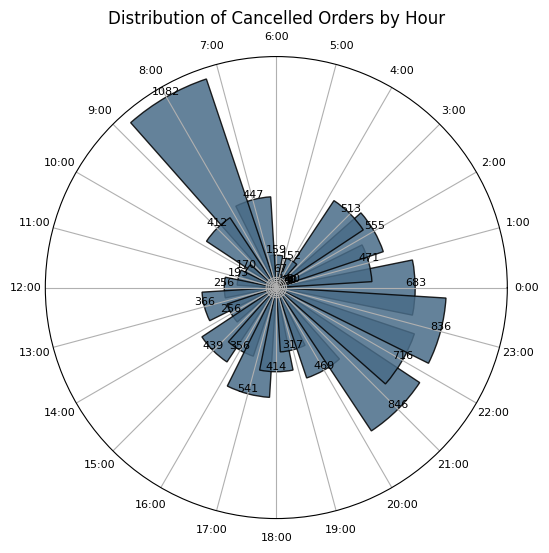

In [198]:
# Sample data
hours = np.arange(24)

# Create a polar plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Convert hours to radians
theta = np.linspace(0, 2*np.pi, len(hours), endpoint=False)

# Plot the bars with edge lines and reduced transparency
bars = ax.bar(theta, failed_orders_grouped['sum'], width=0.4, color='#496c88', edgecolor='black', alpha=0.85)

# Add labels
ax.set_xticks(theta)
ax.set_xticklabels([f'{hour}:00' for hour in hours], fontsize=8)
ax.set_yticks(range(0, max(cancelled_orders) + 1, 10))
ax.set_yticklabels(range(0, max(cancelled_orders) + 1, 10), fontsize=8)

# Add labels to each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.title('Distribution of Cancelled Orders by Hour', fontsize=12)
plt.show()

In [ ]:
merged_data

In [ ]:
filtered_data

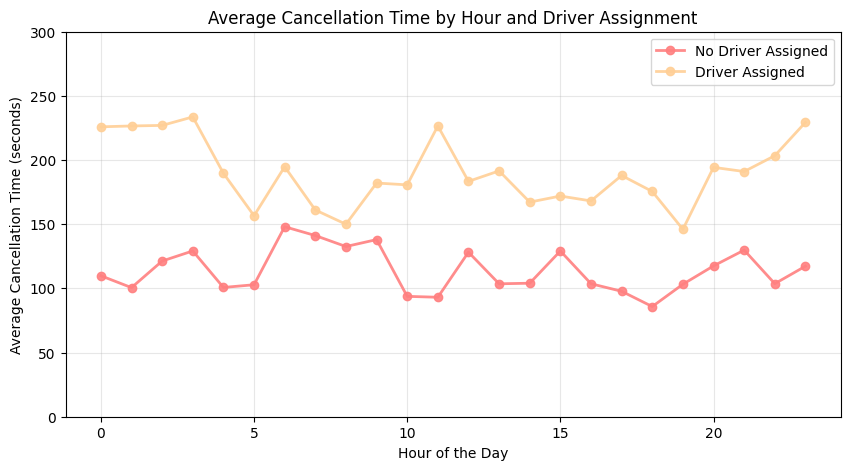

In [252]:
# Step 3: Filter and remove outliers
filtered_data = merged_data[(merged_data['order_status_key'] == 4) & 
                            (merged_data['cancellations_time_in_seconds'] > 0)]  # Assuming cancellation time should be positive

# Remove outliers using z-score method
z_scores = (filtered_data['cancellations_time_in_seconds'] - filtered_data['cancellations_time_in_seconds'].mean()) / filtered_data['cancellations_time_in_seconds'].std()
filtered_data = filtered_data[(z_scores < 3)] 

# Consider values within 3 standard deviations as normal
filtered_data['order_datetime'] = pd.to_datetime(filtered_data['order_datetime'])

# Step 4: Group by hour and driver assignment
grouped_data = filtered_data.groupby(['is_driver_assigned_key', filtered_data['order_datetime'].dt.hour])

# Step 5: Calculate average cancellation time
average_cancellation_time = grouped_data['cancellations_time_in_seconds'].mean().unstack()

average_cancellation_time = average_cancellation_time.T

# Step 6: Plot the results
#colors = ['#496989', '#58A399']
colors=['#FF8080','#FFCF96']

average_cancellation_time.plot(kind='line', figsize=(10, 5), color=colors, marker='o', linewidth=2, alpha=0.9,zorder=2)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Cancellation Time (seconds)')
plt.title('Average Cancellation Time by Hour and Driver Assignment')
plt.legend(['No Driver Assigned', 'Driver Assigned'])
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3,zorder=0)

# 设置 y 轴的范围
plt.ylim(0, 300)

plt.show()

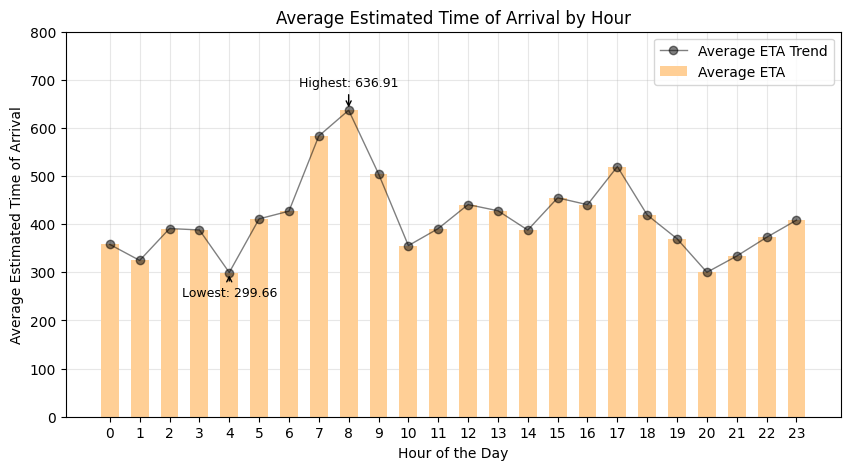

In [269]:
# Step 1: Read the CSV files
data_orders = pd.read_csv("data_orders.csv")

# Step 2: Convert 'order_datetime' to datetime format
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])

# Step 3: Filter the dataset to include only orders with a positive ETA
filtered_data = data_orders[data_orders['m_order_eta'] > 0]

# Step 4: Group by hour
grouped_data = filtered_data.groupby(filtered_data['order_datetime'].dt.hour)

# Step 5: Calculate average ETA for each hour
average_eta = grouped_data['m_order_eta'].mean()

# Step 6: Plot the results
plt.figure(figsize=(10, 5))
# Plot bar chart
plt.bar(average_eta.index, average_eta.values, color='#FFCF96', width=0.6, label='Average ETA', zorder=2)
# Plot line plot
plt.plot(average_eta.index, average_eta.values, marker='o', color='black', linestyle='-', linewidth=1, label='Average ETA Trend', alpha=0.5)

# Find the index of the minimum value
min_index = average_eta.idxmin()
min_value = average_eta[min_index]

# Annotate the lowest point
plt.annotate(f'Lowest: {min_value:.2f}', xy=(min_index, min_value), xytext=(min_index, min_value - 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9, ha='center')

# Find the index of the maximum value
max_index = average_eta.idxmax()
max_value = average_eta[max_index]

# Annotate the highest point
plt.annotate(f'Highest: {max_value:.2f}', xy=(max_index, max_value), xytext=(max_index, max_value + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9, ha='center')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Estimated Time of Arrival')
plt.title('Average Estimated Time of Arrival by Hour')
plt.xticks(range(24))
plt.grid(True, alpha=0.3, zorder=0)
# Set y-axis range
plt.ylim(0, 800)
plt.legend()
plt.show()

In [273]:
# Step 1: Read the CSV files
data_orders = pd.read_csv("data_orders.csv")

# Step 2: Calculate H3 hexagons covering the area of interest
def calculate_hexagons(data, resolution=8):
    hexagons = set()
    for _, row in data.iterrows():
        lat, lon = row['origin_latitude'], row['origin_longitude']
        hexagons.add(h3.geo_to_h3(lat, lon, resolution))
    return hexagons

hexagons = calculate_hexagons(data_orders)

# Step 3: Calculate the number of orders contained within each hexagon
orders_per_hexagon = {}
for hexagon in hexagons:
    orders_per_hexagon[hexagon] = len(data_orders[data_orders.apply(lambda x: h3.geo_to_h3(x['origin_latitude'], x['origin_longitude'], 8) == hexagon, axis=1)])

# Step 4: Sort hexagons by the number of orders
sorted_hexagons = sorted(orders_per_hexagon.items(), key=lambda x: x[1], reverse=True)

# Step 5: Determine the total number of orders and the threshold for selecting top hexagons
total_orders = sum(orders_per_hexagon.values())
eighty_percent_orders = total_orders * 0.8
accumulated_orders = 0
selected_hexagons = []

# Step 6: Iterate through sorted hexagons to find hexagons containing 80% of all orders
for hexagon, num_orders in sorted_hexagons:
    accumulated_orders += num_orders
    selected_hexagons.append(hexagon)
    if accumulated_orders >= eighty_percent_orders:
        break

# Step 7: Determine the maximum number of orders for color scaling
max_orders = max(orders_per_hexagon.values())

# Step 8: Create a color scale
color_map = cm.get_cmap('YlOrRd')

# Step 9: Visualize selected hexagons on a map, coloring them based on the number of orders
m = folium.Map(location=[data_orders['origin_latitude'].mean(), data_orders['origin_longitude'].mean()], zoom_start=10)

for hexagon in selected_hexagons:
    num_orders = orders_per_hexagon[hexagon]
    polygon = h3.h3_to_geo_boundary(hexagon)
    color = color_map(num_orders / max_orders)  # Scale the color based on the number of orders
    color = "#{:02x}{:02x}{:02x}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255))  # Convert to hex color code
    folium.Polygon(locations=polygon, fill=True, fill_color=color, fill_opacity=0.7, color=color).add_to(m)

# Display the map
m.save('selected_hexagons_map.html')

/tmp/ipykernel_3300/3461026524.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('YlOrRd')
